In [1]:
#pip install imbalanced-learn
#pip install -U sklearn 
#pip install -U imblearn

In [105]:
import pandas as pd
import numpy as np
from os import listdir
from os.path import isfile, join
import pyarrow.parquet as pq
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from socket import gethostname
import dask.dataframe as dd
from time import sleep
import sweetviz as sv
#import dask_memusage
#import sklearn
pd.set_option('display.max_columns', None)
from category_encoders import MEstimateEncoder
from collections import Counter
from matplotlib import pyplot
from numpy import where
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics


In [3]:
path = "F:\Study\GeorgiaTech\Practicum\data\output" 
report_path = r"F:\Study\GeorgiaTech\Practicum\data\Defects Data Tableau FY21 to 12-13-21 FY22 Product Quality.xlsx"
#path = r"rC:\Users\kk_kr\Downloads" 
onlyfiles = [f for f in listdir(path) if isfile(join(path, f)) if 'flag_defects' in f]
display(onlyfiles)

['flag_defects_usingSalesOrder.csv', 'flag_defects_usingSalesOrder_Item.csv']

In [4]:
df_salesOrderItem = pd.read_csv(path + "//flag_defects_usingSalesOrder_Item.csv")
#df_salesOrder = pd.read_csv(path + "//flag_defects_usingSalesOrder.csv")
report_data = pd.read_excel(report_path)

In [5]:
#Write these files to csv or parquet
#outPath = r'F:\Study\GeorgiaTech\Practicum\data\Output'
#flag_defects_usingSalesOrder.to_csv(outPath+'\\flag_defects_usingSalesOrder.csv')
#flag_defects_usingSalesOrder_Item.to_csv(outPath+'\\flag_defects_usingSalesOrder_Item.csv')

In [6]:
#df_salesOrderItem.shape, df_salesOrder.shape

In [7]:
#df_salesOrder.columns

In [8]:
# df_salesOrder = df_salesOrder.drop(columns = [
# '0UPD_DATE',
# '4ZSD_AD06_GEWEI',
# '4ZSD_AD06_GEWEI___T',
# '4ZSD_AD06_GRKOR',
# '4ZSD_AD06_GSBER',
# '4ZSD_AD06_MFRGR',
# '4ZSD_AD06_PRCTR',
# '4ZSD_AD06_PSTYV',
# '4ZSD_AD06_STKEY',
# '4ZSD_AD06_STLNR',
# '4ZSD_AD06_STLTY',
# '4ZSD_AD06_ZZLINEPACKAGE',
# '4ZSD_AD06_ZZMPBLDDATE',
# '4ZSD_AD06_ZZORGDLRDLVYDATE',
# '4ZSD_AD06_ZZPRCQTE'])
df_salesOrderItem = df_salesOrderItem.drop(columns = [
'0UPD_DATE',
'4ZSD_AD06_GEWEI',
'4ZSD_AD06_GEWEI___T',
'4ZSD_AD06_GRKOR',
'4ZSD_AD06_GSBER',
'4ZSD_AD06_MFRGR',
'4ZSD_AD06_PRCTR',
'4ZSD_AD06_PSTYV',
'4ZSD_AD06_STKEY',
'4ZSD_AD06_STLNR',
'4ZSD_AD06_STLTY',
'4ZSD_AD06_ZZLINEPACKAGE',
'4ZSD_AD06_ZZMPBLDDATE',
'4ZSD_AD06_ZZORGDLRDLVYDATE',
'4ZSD_AD06_ZZPRCQTE'])

In [9]:
df_modelInput = df_salesOrderItem.drop( \
                                      columns = ['Unnamed: 0',\
                                                 '0PLANT___T', \
                                                 '4ZSD_AD06_VBELN',\
                                                 '4ZSD_AD06_POSNR',\
                                                 '4ZSD_AD06_UEPOS',\
                                                 '0PLANT',\
                                                 '4ZSD_AD06_ERDAT',\
                                                 '4ZSD_AD06_MATKL',\
                                                 '4ZSD_AD06_MATNR',\
                                                 '4ZSD_AD06_VOLEH',\
                                                 '4ZSD_AD06_VOLEH___T',\
                                                 '4ZSD_AD06_ZZCONF_DELV',\
                                                 '4ZSD_AD06_ZZCONF_MAD',\
                                                 '4ZSD_AD06_ZZCUSTREQDATE',\
                                                 '4ZSD_AD06_BRGEW',\
                                                 'Material (Parcel)',\
                                                 'Reporting Plant',\
                                                 '4ZSD_AD06_ZZPACKVORSCHR',\
                                                 #'Sales Order',\ -- To tie back to df from modelInput
                                                 #'Sales Order item',\ -- To tie back to df from modelInput
                                                 'Act Ship Com Dt' \
                                                ])

df_modelInput['4ZSD_AD06_KONDM'] = df_modelInput['4ZSD_AD06_KONDM'].fillna(0)


In [10]:
df_modelInput = df_modelInput[df_modelInput['Value Stream']=='Components'].drop(columns = ['Value Stream'])
#df_modelInput = df_modelInput.drop(columns = ['Material (Parcel)'])

In [11]:
df_salesOrderItem_Components = df_salesOrderItem[df_salesOrderItem['Value Stream']=='Components']

In [12]:
#This flag indicates whether its a special order or not 
df_modelInput['4ZSD_AD06_ZZTUSPCLIND'] = df_modelInput['4ZSD_AD06_ZZTUSPCLIND'].fillna(0)

In [13]:
df_modelInput[df_modelInput['4ZSD_AD06_ZZTUSPCLIND']!=0].groupby('defectFlag').count()

,4ZSD_AD06_KONDM,4ZSD_AD06_LPRIO,4ZSD_AD06_ROUTE,4ZSD_AD06_VSTEL,4ZSD_AD06_ZZCARTIND,4ZSD_AD06_ZZCONPATH,4ZSD_AD06_ZZTUSPCLIND,4ZSD_AD06_KBMENG,4ZSD_AD06_NTGEW,4ZSD_AD06_VOLUM,4ZSD_AD06_ZZLINEVOLUME,4ZSD_AD06_ZZLINEWEIGHT,Sales Order,Sales Order item,Pieces Shipped_x,PCC,Product Line,GM Category,Op Prod Category,Product Sub-Cat,PL Category,Unnamed: 12,Work Center,Pieces Shipped (ALL),Calendar Day,Shipping type,Order Shipment Code
defectFlag,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,4536,4536,4536,4536,4533,4476,4536,4536,4536,4536,4536,4536,4536,4536,4536,4536,4536,4536,4536,4536,4536,4536,4536,4495,4495,4495,4495
1.0,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34


In [14]:
#Replace all NA with 0
df_modelInput = df_modelInput.fillna(0)

In [15]:
#Replace X to 1. 
df_modelInput['4ZSD_AD06_ZZTUSPCLIND'].replace('X',1,inplace=True)

In [16]:
df_modelInput.groupby('4ZSD_AD06_ZZTUSPCLIND').count()

,4ZSD_AD06_KONDM,4ZSD_AD06_LPRIO,4ZSD_AD06_ROUTE,4ZSD_AD06_VSTEL,4ZSD_AD06_ZZCARTIND,4ZSD_AD06_ZZCONPATH,4ZSD_AD06_KBMENG,4ZSD_AD06_NTGEW,4ZSD_AD06_VOLUM,4ZSD_AD06_ZZLINEVOLUME,4ZSD_AD06_ZZLINEWEIGHT,Sales Order,Sales Order item,Pieces Shipped_x,PCC,Product Line,GM Category,Op Prod Category,Product Sub-Cat,PL Category,Unnamed: 12,Work Center,Pieces Shipped (ALL),Calendar Day,Shipping type,Order Shipment Code,defectFlag
4ZSD_AD06_ZZTUSPCLIND,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312,714312
1,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570,4570


## Trying target encoding where it makes sense

### Categorical columns
* Below 2 have only 2 categories, so encoding them as 0 vs 1 
    * 4ZSD_AD06_ZZCARTIND
    * Order Shipment Code

* 4ZSD_AD06_LPRIO

                                             |                                             | [  0%]   00:00 ->…

KeyboardInterrupt: 

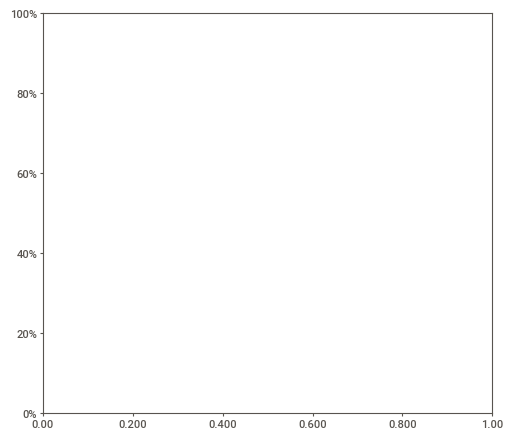

In [17]:
#Analyze the input now 
excludeCols = []
defects_report = sv.analyze(df_modelInput[df_modelInput.columns[~df_modelInput.columns.isin(excludeCols)]])

In [ ]:
defects_report.show_html('EDA.html')

In [18]:
f = lambda x: 0 if x =='C' else 1
df_modelInput['4ZSD_AD06_ZZCARTIND'] = df_modelInput['4ZSD_AD06_ZZCARTIND'].map(f)

In [19]:
g = lambda x: 0 if x =='Cust Dlvy' else 1
df_modelInput['Order Shipment Code'] = df_modelInput['Order Shipment Code'].map(g)
df_modelInput.groupby('Order Shipment Code').count()

,4ZSD_AD06_KONDM,4ZSD_AD06_LPRIO,4ZSD_AD06_ROUTE,4ZSD_AD06_VSTEL,4ZSD_AD06_ZZCARTIND,4ZSD_AD06_ZZCONPATH,4ZSD_AD06_ZZTUSPCLIND,4ZSD_AD06_KBMENG,4ZSD_AD06_NTGEW,4ZSD_AD06_VOLUM,4ZSD_AD06_ZZLINEVOLUME,4ZSD_AD06_ZZLINEWEIGHT,Sales Order,Sales Order item,Pieces Shipped_x,PCC,Product Line,GM Category,Op Prod Category,Product Sub-Cat,PL Category,Unnamed: 12,Work Center,Pieces Shipped (ALL),Calendar Day,Shipping type,defectFlag
Order Shipment Code,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,321932,321932,321932,321932,321932,321932,321932,321932,321932,321932,321932,321932,321932,321932,321932,321932,321932,321932,321932,321932,321932,321932,321932,321932,321932,321932,321932
1,396950,396950,396950,396950,396950,396950,396950,396950,396950,396950,396950,396950,396950,396950,396950,396950,396950,396950,396950,396950,396950,396950,396950,396950,396950,396950,396950


In [20]:
#h = lambda x: 'O' if x in ('')

In [21]:
#Changing datatype to category
df_modelInput['Order Shipment Code'] = df_modelInput['Order Shipment Code'].astype('category')
df_modelInput['4ZSD_AD06_ZZCARTIND'] = df_modelInput['4ZSD_AD06_ZZCARTIND'].astype('category')
#df_modelInput['4ZSD_AD06_LPRIO'] = df_modelInput['4ZSD_AD06_LPRIO'].astype('category')
df_modelInput['4ZSD_AD06_VSTEL'] = df_modelInput['4ZSD_AD06_VSTEL'].astype('category')
df_modelInput['4ZSD_AD06_ZZCONPATH'] = df_modelInput['4ZSD_AD06_ZZCONPATH'].astype('category')
df_modelInput['PCC'] = df_modelInput['PCC'].astype('category')
df_modelInput['Product Line'] = df_modelInput['Product Line'].astype('category')
df_modelInput['GM Category'] = df_modelInput['GM Category'].astype('category')
df_modelInput['Op Prod Category'] = df_modelInput['Op Prod Category'].astype('category')
df_modelInput['Product Sub-Cat'] = df_modelInput['Product Sub-Cat'].astype('category')
df_modelInput['PL Category'] = df_modelInput['PL Category'].astype('category')
df_modelInput['Unnamed: 12'] = df_modelInput['Unnamed: 12'].astype('category')
df_modelInput['Work Center'] = df_modelInput['Work Center'].astype('category')
df_modelInput['Shipping type'] = df_modelInput['Shipping type'].astype('category')

In [22]:
df_modelInput = pd.get_dummies(df_modelInput,columns=['4ZSD_AD06_KONDM'],prefix='4ZSD_AD06_KONDM')

In [23]:
df_modelInput.head(10)

,4ZSD_AD06_LPRIO,4ZSD_AD06_ROUTE,4ZSD_AD06_VSTEL,4ZSD_AD06_ZZCARTIND,4ZSD_AD06_ZZCONPATH,4ZSD_AD06_ZZTUSPCLIND,4ZSD_AD06_KBMENG,4ZSD_AD06_NTGEW,4ZSD_AD06_VOLUM,4ZSD_AD06_ZZLINEVOLUME,4ZSD_AD06_ZZLINEWEIGHT,Sales Order,Sales Order item,Pieces Shipped_x,PCC,Product Line,GM Category,Op Prod Category,Product Sub-Cat,PL Category,Unnamed: 12,Work Center,Pieces Shipped (ALL),Calendar Day,Shipping type,Order Shipment Code,defectFlag,4ZSD_AD06_KONDM_0.0,4ZSD_AD06_KONDM_1.0,4ZSD_AD06_KONDM_3.0,4ZSD_AD06_KONDM_4.0
2,50,TS02,GM00,0,AA2GM,0,1.0,0.035,0.999,2.224,4.535,7507558,2280,1,ANSWER PANEL JUNCTIONS,Answer,Furniture,Panel - Structure/Trim,Systems,Panels,"PKG- TRIM, T, THIN, 54 - NO HDWR",ANSWER CARTON TRIM,1.0,2020-05-29,FTL (Full Trk Load),0,0.0,1,0,0,0
6,50,TS07,GM00,0,AA2GM,0,12.0,8.460,11.988,1.864,10.860,7633395,2150,12,ANSWER PANEL FRAMES,Answer,Furniture,Panel - Structure/Trim,Systems,Panels,"PKG - HORIZONTAL BEAM, 48 (QTY ONE)",BLACK LINE (VAR - PREVIOUSLY RFC),12.0,2020-06-18,FTL (Full Trk Load),0,0.0,0,1,0,0
11,50,TS01,EP00,0,AA2EP,0,1.0,4.790,0.999,2.970,8.890,7688365,1360,1,ANSWER PANEL FULL,Answer,Furniture,Panel,Systems,Panels,"PACKAGE - TRIM, BASE, 60",ANSWER CARTON TRIM,1.0,2020-07-18,FTL (Full Trk Load),0,0.0,0,1,0,0
14,50,TS01,GM00,0,AA2GM,0,4.0,0.152,3.996,0.081,0.402,7712293,7840,4,ANSWER PANEL JUNCTIONS,Answer,Furniture,Panel - Structure/Trim,Systems,Panels,"ALIGNER PKG - TOP CAP, INLINE, THIN",ANSWER FINAL,4.0,2020-10-16,FTL (Full Trk Load),0,0.0,1,0,0,0
17,50,TS01,EP00,0,AA2EP,0,6.0,46.080,0.600,1.928,48.080,7726063,840,6,"Storage, Answer Bins",Answer,Furniture,Storage - Overhead,Systems,Personal Storage,"PACK - SUPPORT, WALL CHANNEL",ANSWER CARTON TRIM,6.0,2020-03-16,FTL (Full Trk Load),0,0.0,0,1,0,0
20,50,TS02,GM00,0,AA2GM,0,32.0,523.296,31.968,32.000,539.296,7729428,7410,32,Answer Markerboard Skins,Answer,Furniture,Panel - Skins/Tiles,Systems,Panels,"Skin-markerboard, 24x48",ANSWER PAN FINAL,32.0,2020-06-12,FTL (Full Trk Load),0,0.0,0,1,0,0
22,50,TS01,CC00,0,AA2CC,0,2.0,1.154,1.998,0.502,1.854,7732999,390,2,ANSWER PANEL FULL,Answer,Furniture,Panel,Systems,Panels,"PACKAGE - BASE CABLE TRAY, 30",BLACK LINE (VAR - PREVIOUSLY RFC),2.0,2020-04-10,FTL (Full Trk Load),0,0.0,0,1,0,0
25,50,TS01,NG00,0,AA2NG,0,3.0,1.170,1.839,2.461,3.870,7750785,550,3,ANSWER PANEL JUNCTIONS,Answer,Furniture,Panel - Structure/Trim,Systems,Panels,"JUNCTION ASSY - CHG OF HGT, L, 48X66",BLACK LINE (VAR - PREVIOUSLY RFC),3.0,2020-03-19,FTL (Full Trk Load),0,0.0,0,1,0,0
32,50,TS02,GM00,0,AA2GM,0,154.0,257.950,0.308,17.780,282.450,7768466,860,154,ANSWER PANEL FRAMES,Answer,Furniture,Panel - Structure/Trim,Systems,Panels,"CAP - TOP ASSY, THIN, 36(35.96)",ANSWER CARTON TRIM,154.0,2020-05-14,FTL (Full Trk Load),0,0.0,1,0,0,0
34,50,TS01,GM00,0,AA2GM,0,80.0,56.400,79.920,20.936,66.200,7768952,180,80,Answer Fence Structure,Answer Fence,Furniture,Panel - Structure/Trim,Systems,Non-Panel Based Systems,"PKG - HORIZONTAL BEAM, 72 (QTY ONE)",BLACK LINE (VAR - PREVIOUSLY RFC),80.0,2020-03-06,FTL (Full Trk Load),0,0.0,0,1,0,0


In [24]:
df_modelInput.groupby('defectFlag').count()

,4ZSD_AD06_LPRIO,4ZSD_AD06_ROUTE,4ZSD_AD06_VSTEL,4ZSD_AD06_ZZCARTIND,4ZSD_AD06_ZZCONPATH,4ZSD_AD06_ZZTUSPCLIND,4ZSD_AD06_KBMENG,4ZSD_AD06_NTGEW,4ZSD_AD06_VOLUM,4ZSD_AD06_ZZLINEVOLUME,4ZSD_AD06_ZZLINEWEIGHT,Sales Order,Sales Order item,Pieces Shipped_x,PCC,Product Line,GM Category,Op Prod Category,Product Sub-Cat,PL Category,Unnamed: 12,Work Center,Pieces Shipped (ALL),Calendar Day,Shipping type,Order Shipment Code,4ZSD_AD06_KONDM_0.0,4ZSD_AD06_KONDM_1.0,4ZSD_AD06_KONDM_3.0,4ZSD_AD06_KONDM_4.0
defectFlag,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,717422,717422,717422,717422,717422,717422,717422,717422,717422,717422,717422,717422,717422,717422,717422,717422,717422,717422,717422,717422,717422,717422,717422,717422,717422,717422,717422,717422,717422,717422
1.0,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460


In [25]:
1460/717422

0.0020350644390609712

In [26]:
#mEstimate for fields 
mEstimator = MEstimateEncoder()
df_modelInput['4ZSD_AD06_LPRIO_mEnc'] = mEstimator.fit_transform(df_modelInput['4ZSD_AD06_LPRIO'],df_modelInput['defectFlag'])

In [27]:
mEstimator = MEstimateEncoder()
df_modelInput['4ZSD_AD06_VSTEL_mEnc'] = mEstimator.fit_transform(df_modelInput['4ZSD_AD06_VSTEL'],df_modelInput['defectFlag'])
mEstimator = MEstimateEncoder()
df_modelInput['4ZSD_AD06_ZZCONPATH_mEnc'] = mEstimator.fit_transform(df_modelInput['4ZSD_AD06_ZZCONPATH'],df_modelInput['defectFlag'])
mEstimator = MEstimateEncoder()
df_modelInput['PCC_mEnc'] = mEstimator.fit_transform(df_modelInput['PCC'],df_modelInput['defectFlag'])
mEstimator = MEstimateEncoder()
df_modelInput['Product Line_mEnc'] = mEstimator.fit_transform(df_modelInput['Product Line'],df_modelInput['defectFlag'])
mEstimator = MEstimateEncoder()
df_modelInput['GM Category_mEnc'] = mEstimator.fit_transform(df_modelInput['GM Category'],df_modelInput['defectFlag'])
mEstimator = MEstimateEncoder()
df_modelInput['Op Prod Category_mEnc'] = mEstimator.fit_transform(df_modelInput['Op Prod Category'],df_modelInput['defectFlag'])
mEstimator = MEstimateEncoder()
df_modelInput['Product Sub-Cat_mEnc'] = mEstimator.fit_transform(df_modelInput['Product Sub-Cat'],df_modelInput['defectFlag'])
mEstimator = MEstimateEncoder()
df_modelInput['PL Category_mEnc'] = mEstimator.fit_transform(df_modelInput['PL Category'],df_modelInput['defectFlag'])
mEstimator = MEstimateEncoder()
df_modelInput['Unnamed: 12_mEnc'] = mEstimator.fit_transform(df_modelInput['Unnamed: 12'],df_modelInput['defectFlag'])
mEstimator = MEstimateEncoder()
df_modelInput['Work Center_mEnc'] = mEstimator.fit_transform(df_modelInput['Work Center'],df_modelInput['defectFlag'])
mEstimator = MEstimateEncoder()
df_modelInput['Shipping type_mEnc'] = mEstimator.fit_transform(df_modelInput['Shipping type'],df_modelInput['defectFlag'])

In [28]:
mEstimator = MEstimateEncoder()
df_modelInput['4ZSD_AD06_ROUTE_mEnc'] = mEstimator.fit_transform(df_modelInput['4ZSD_AD06_ROUTE'],df_modelInput['defectFlag'])

In [29]:
df_modelInput= df_modelInput.drop(columns=['4ZSD_AD06_VSTEL'
,'4ZSD_AD06_ZZCONPATH'
,'PCC'
,'Product Line'
,'GM Category'
,'Op Prod Category'
,'Product Sub-Cat'
,'PL Category'
,'Unnamed: 12'
,'Work Center'
,'Shipping type'])

In [30]:
df_modelInput = df_modelInput.drop(columns=['4ZSD_AD06_ROUTE'])

In [31]:
df_modelInput_withoutKeys = df_modelInput.drop(columns = ['Calendar Day','Sales Order','Sales Order item'])

In [32]:
#Separate out features and label
df_modelInput_withoutKeys_X = df_modelInput_withoutKeys.loc[:, ~df_modelInput_withoutKeys.columns.isin(['defectFlag'])]
df_modelInput_withoutKeys_y = df_modelInput_withoutKeys.loc[:, df_modelInput_withoutKeys.columns.isin(['defectFlag'])]

In [33]:
df_modelInput_withoutKeys_X.columns

Index(['4ZSD_AD06_LPRIO', '4ZSD_AD06_ZZCARTIND', '4ZSD_AD06_ZZTUSPCLIND',
       '4ZSD_AD06_KBMENG', '4ZSD_AD06_NTGEW', '4ZSD_AD06_VOLUM',
       '4ZSD_AD06_ZZLINEVOLUME', '4ZSD_AD06_ZZLINEWEIGHT', 'Pieces Shipped_x',
       'Pieces Shipped (ALL)', 'Order Shipment Code', '4ZSD_AD06_KONDM_0.0',
       '4ZSD_AD06_KONDM_1.0', '4ZSD_AD06_KONDM_3.0', '4ZSD_AD06_KONDM_4.0',
       '4ZSD_AD06_LPRIO_mEnc', '4ZSD_AD06_VSTEL_mEnc',
       '4ZSD_AD06_ZZCONPATH_mEnc', 'PCC_mEnc', 'Product Line_mEnc',
       'GM Category_mEnc', 'Op Prod Category_mEnc', 'Product Sub-Cat_mEnc',
       'PL Category_mEnc', 'Unnamed: 12_mEnc', 'Work Center_mEnc',
       'Shipping type_mEnc', '4ZSD_AD06_ROUTE_mEnc'],
      dtype='object')

In [34]:
numericCols = [i for i in df_modelInput_withoutKeys_X.columns if i not in ('4ZSD_AD06_ZZCARTIND',\
                                                                 '4ZSD_AD06_KONDM_0.0',\
                                                                 '4ZSD_AD06_KONDM_1.0',\
                                                                 '4ZSD_AD06_KONDM_3.0',\
                                                                 '4ZSD_AD06_KONDM_4.0',\
                                                                 'Order Shipment Code'
                                                                )] 

In [35]:
#Standardizing
#https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/
for i in numericCols:
    scale = StandardScaler().fit(df_modelInput_withoutKeys_X[[i]])
    
    df_modelInput_withoutKeys_X[i] = scale.transform(df_modelInput_withoutKeys_X[[i]])

<ipython-input-35-09806fba7cf1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelInput_withoutKeys_X[i] = scale.transform(df_modelInput_withoutKeys_X[[i]])
<ipython-input-35-09806fba7cf1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_modelInput_withoutKeys_X[i] = scale.transform(df_modelInput_withoutKeys_X[[i]])
<ipython-input-35-09806fba7cf1>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [70]:
df_modelInput_withoutKeys_X.describe()

,4ZSD_AD06_LPRIO,4ZSD_AD06_ZZTUSPCLIND,4ZSD_AD06_KBMENG,4ZSD_AD06_NTGEW,4ZSD_AD06_VOLUM,4ZSD_AD06_ZZLINEVOLUME,4ZSD_AD06_ZZLINEWEIGHT,Pieces Shipped_x,Pieces Shipped (ALL),4ZSD_AD06_KONDM_0.0,4ZSD_AD06_KONDM_1.0,4ZSD_AD06_KONDM_3.0,4ZSD_AD06_KONDM_4.0,4ZSD_AD06_LPRIO_mEnc,4ZSD_AD06_VSTEL_mEnc,4ZSD_AD06_ZZCONPATH_mEnc,PCC_mEnc,Product Line_mEnc,GM Category_mEnc,Op Prod Category_mEnc,Product Sub-Cat_mEnc,PL Category_mEnc,Unnamed: 12_mEnc,Work Center_mEnc,Shipping type_mEnc,4ZSD_AD06_ROUTE_mEnc
count,7.188820e+05,7.188820e+05,7.188820e+05,7.188820e+05,7.188820e+05,7.188820e+05,7.188820e+05,7.188820e+05,7.188820e+05,718882.000000,718882.000000,718882.000000,718882.000000,7.188820e+05,7.188820e+05,7.188820e+05,7.188820e+05,7.188820e+05,7.188820e+05,7.188820e+05,7.188820e+05,7.188820e+05,7.188820e+05,7.188820e+05,7.188820e+05,7.188820e+05
mean,-1.319711e-16,3.117413e-17,-5.535038e-19,1.704199e-16,-1.986683e-17,4.806093e-17,5.578528e-17,-3.174740e-17,-1.049680e-17,0.492049,0.506880,0.000278,0.000793,-1.319711e-16,-3.720336e-17,-3.797837e-15,1.115903e-16,1.635999e-16,1.233720e-16,-5.086305e-17,5.152725e-16,1.449053e-15,-5.547887e-17,1.580056e-16,1.443143e-15,2.470999e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.499937,0.499953,0.016677,0.028147,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-5.428979e+00,-7.998603e-02,-3.199739e-01,-2.416649e-01,-2.882768e-01,-1.968970e-01,-2.523393e-01,-3.199714e-01,-3.560024e-01,0.000000,0.000000,0.000000,0.000000,-5.428979e+00,-5.778236e+00,-1.519445e+00,-4.829611e-01,-9.590860e-01,-2.379510e+00,-6.057896e-01,-1.657760e+00,-1.701101e+00,-2.735295e-01,-5.290516e-01,-5.069460e+00,-6.159092e+00
25%,2.348412e-01,-7.998603e-02,-2.835761e-01,-2.291346e-01,-2.782944e-01,-1.654123e-01,-2.283907e-01,-2.835735e-01,-3.190767e-01,0.000000,0.000000,0.000000,0.000000,2.348412e-01,-1.402825e+00,-1.422377e+00,-3.575432e-01,-2.606693e-01,-1.048787e-01,-3.820151e-01,-1.145478e-01,-8.248591e-02,-2.723613e-01,-4.775242e-01,5.102973e-02,6.353500e-02
50%,2.348412e-01,-7.998603e-02,-2.471784e-01,-1.957204e-01,-2.281317e-01,-1.352395e-01,-1.946232e-01,-2.471756e-01,-2.452254e-01,0.000000,1.000000,0.000000,0.000000,2.348412e-01,2.062784e-01,2.033994e-01,-2.858387e-01,-2.606693e-01,-1.048787e-01,-3.820151e-01,-1.145478e-01,-8.248591e-02,-2.297737e-01,-1.794034e-01,5.102973e-02,6.353500e-02
75%,2.348412e-01,-7.998603e-02,-6.518957e-02,-8.601917e-02,-8.787663e-02,-3.952212e-02,-8.656732e-02,-6.518611e-02,-6.059722e-02,1.000000,1.000000,0.000000,0.000000,2.348412e-01,6.573344e-01,6.608722e-01,-2.584626e-01,-2.606693e-01,-1.048787e-01,-2.745882e-01,-1.145478e-01,-8.248591e-02,-1.243754e-01,-1.794034e-01,5.102973e-02,1.623090e-01
max,5.783073e+00,1.250218e+01,1.270358e+02,1.862467e+02,1.574661e+02,1.831236e+02,1.902452e+02,1.270363e+02,1.288838e+02,1.000000,1.000000,1.000000,1.000000,5.783073e+00,3.531194e+00,1.462044e+00,1.441670e+01,9.480186e+00,1.489397e+01,5.569497e+00,1.542001e+01,1.528422e+01,1.016471e+02,9.407664e+00,2.676375e+01,5.117019e+01


In [52]:
np.array(df_modelInput_withoutKeys_y)
np.array(df_modelInput_withoutKeys_X)

array([[0.23484118875993473, 0, -0.07998602729392248, ...,
        -0.1794033728510121, 0.051029728843069, 0.16230898349826275],
       [0.23484118875993473, 0, -0.07998602729392248, ...,
        -0.47752421509825427, 0.051029728843069, 2.70686144557306],
       [0.23484118875993473, 0, -0.07998602729392248, ...,
        -0.1794033728510121, 0.051029728843069, 0.06353500362031547],
       ...,
       [0.23484118875993473, 0, -0.07998602729392248, ...,
        -0.1794033728510121, -5.069460170721262, 0.06353500362031547],
       [-4.735449904774339, 0, -0.07998602729392248, ...,
        -0.1794033728510121, 0.051029728843069, 0.06353500362031547],
       [0.23484118875993473, 0, -0.07998602729392248, ...,
        -0.47752421509825427, 0.051029728843069, 0.06353500362031547]],
      dtype=object)

In [74]:
X.shape, df_modelInput_withoutKeys_X.shape

((1434844, 28), (718882, 28))

### Try upsampling of data using SMOTE

In [76]:
X = np.array(df_modelInput_withoutKeys_X)
y = np.array(df_modelInput_withoutKeys_y)
print ("BEFORE:")
print(X.shape,y.shape)

#https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html

oversample = SMOTE() #Takes all minority class and tries to upsample - Check link above
#oversample = SMOTE(sampling_strategy = 0.1) #Takes 10% of minority class and tries to upsample

X, y = oversample.fit_resample(X, y)

print ("AFTER:")
print(X.shape,y.shape)

BEFORE:
(718882, 28) (718882, 1)
AFTER:
(1434844, 28) (1434844,)


### Split into training and test

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.75,test_size=0.25,random_state = 22)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1076133, 28) (358711, 28) (1076133,) (358711,)


### Logistic Regression

In [117]:
clf = LogisticRegression(random_state=22,max_iter=200).fit(X_train,y_train)

In [118]:
clf.predict_proba(X_test)

array([[4.39657298e-01, 5.60342702e-01],
       [7.48870164e-01, 2.51129836e-01],
       [2.75320699e-01, 7.24679301e-01],
       ...,
       [6.25958941e-05, 9.99937404e-01],
       [8.26090435e-01, 1.73909565e-01],
       [8.32395445e-01, 1.67604555e-01]])

In [119]:
score = clf.score(X_test,y_test)
score

0.823501370183797

In [120]:
predictions = clf.predict(X_test)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.900


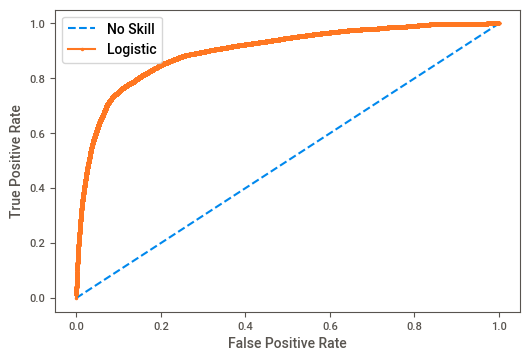

In [121]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [122]:
cm = metrics.confusion_matrix(y_test,predictions)

print(cm)

[[163447  15873]
 [ 47439 131952]]


### Naive Bayes

In [106]:
nb = GaussianNB().fit(X_train,y_train)

In [108]:
nbpredictions = nb.predict(X_test)

In [111]:
cm = metrics.confusion_matrix(y_test,nbpredictions)
print(cm)

[[152073  27247]
 [ 54003 125388]]


In [112]:
print(nb.score(X_test,y_test))

0.7734945401730083


In [116]:
nb.predict_proba(X_test)

FloatingPointError: underflow encountered in exp

In [115]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = nb.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

FloatingPointError: underflow encountered in exp